Strated this code cause it seemed there was some clock drift apparent even after aligning spike trains to state0 DIO (i.e. spike_times{i} = spike_times - state0_dio{i} + (alignEvent{i} - state0_bpod{i}). Drift appeard in the form of a peak with a constant time offset of a few ms over consecutive trials. That was observed before a bug with subtracting the first element of state0_dio from the entire vector, but not of the corresponding spike times - and hasn't been obvserved after, so I'm ignoring it for now.

In [1]:
import os
import re
import sys

import numpy as np
import matplotlib as mp
import pandas as pd
import scipy as sp
import scipy.stats as spt
import scipy.io as sio
import matplotlib.pyplot as plt

from tasks import dual2afc
from traum import traum as tr
#from traum.mdaio import readmda
#from traum import readDIO
#from traum.readTrodesExtractedDataFile import readTrodesExtractedDataFile as readdat

print(sys.version)

2.7.14 |Anaconda, Inc.| (default, Mar 27 2018, 12:28:59) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## Behavior

In [2]:
pathBhv = os.path.join('datasets/dual2afc_ds1/','bhv','M14','M14_Dual2AFC_Nov17_2017_Session1.mat')
dataBhv = dual2afc.parser(sio.loadmat(pathBhv, squeeze_me=True))

In [3]:
obj = tr.traum(dataBhv)

## Neural

In [4]:
pathNeur = os.path.join('datasets/dual2afc_ds1/','neur','M14','M14_20171117_175330')

obj.readNeur(pathNeur)

## Sync

In [5]:
pathDIO = os.path.join('datasets/dual2afc_ds1/','neur','M14','M14_20171117_175330','dio')
obj.readDio(pathDIO)

obj.sync()

## Evoking traum

#reload(tr)

In [7]:
trialMask = obj.bhv.parsedData['Rewarded'].values
alignment = 'tsRwd'

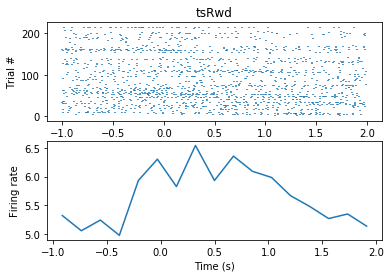

In [8]:
hf, ha = plt.subplots(2,1)
ha = obj.raspeth(alignment,18,trialMask,ha)

In [10]:
obj.bhv.parsedData

,ChoiceLeft,ChoiceMiss,ChoiceRight,OdorFracA,Rewarded,nTrials,tsChoice,tsPokeC,tsPokeL,tsPokeR,tsRwd,tsState0,tsTrialStart
0,False,False,True,10,False,1,NaN,0.5332,[],"[1.6174000000000002, 1.6947999999999999, 1.866...",NaN,0.000,0.5332
1,False,False,True,90,False,2,NaN,4.0367,[],"[5.1752, 5.4573, 5.8167]",NaN,4.955,4.0367
2,False,False,True,10,True,3,NaN,12.33,[],"[13.5271, 13.749799999999999, 14.290700000000001]",14.5271,13.884,12.3300
3,False,True,False,10,False,4,NaN,1.4249,[],[],NaN,29.625,1.4249
4,False,False,True,90,False,5,NaN,2.5978,[],"[3.5799000000000003, 3.8265, 4.3388]",NaN,33.723,2.5978
5,False,True,False,90,False,6,NaN,"[2.7051, 4.436]",[],[],NaN,40.410,2.7051
6,False,True,False,90,False,7,NaN,0.2511,1.2108,[],NaN,45.685,0.2511
7,False,True,False,90,False,8,NaN,5.5829,[],6.2921,NaN,55.951,5.5829
8,False,True,False,90,False,9,NaN,2.4637,[],[],NaN,64.086,2.4637
9,False,False,True,10,True,10,NaN,9.4481,[],"[10.6024, 10.835700000000001, 11.3959]",11.6024,68.920,9.4481
